In [2]:
# Заменить на свой путь
import sys
sys.path.append(r'D:\repositories\baltika_hack')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Поломки

In [4]:
breakdowns_df = pd.read_excel(r'Поломки за 5 лет.xlsx')
breakdowns_df.tail()

,start,end,reason_id,reason_group,reason,duration
526,2024-11-04 16:04:20,2024-11-04 16:07:21,2010004,Breakdowns,Замена тормозной пластины на 10 наполнителе.,3.016667
527,2024-11-04 19:15:34,2024-11-04 19:17:41,2010004,Breakdowns,Замена тормозной пластины на 66 наполнителе,2.100000
528,2024-11-05 09:48:48,2024-11-05 09:51:31,2010004,Breakdowns,замена тормозной пластины,2.716667
529,2024-11-21 03:12:49,2024-11-21 03:16:28,2010004,Breakdowns,МЕХ. Недолив. Пустые банки. 20/32/33/39,3.650000
530,2024-11-21 03:24:45,2024-11-21 03:28:36,2010004,Breakdowns,МЕХ. Недолив. Пустые банки. 20/32/33/39,3.833333


## Общая информация

In [5]:
breakdowns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   start         531 non-null    datetime64[ns]
 1   end           531 non-null    datetime64[ns]
 2   reason_id     531 non-null    int64         
 3   reason_group  531 non-null    object        
 4   reason        531 non-null    object        
 5   duration      531 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 25.0+ KB


In [6]:
print(breakdowns_df.describe())

# Проверка на пропуски
print("\nКоличество пропусков в каждом столбце:")
print(breakdowns_df.isnull().sum())

# Проверка на дубликаты
print("\nКоличество дубликатов:")
print(breakdowns_df.duplicated().sum())

# Проверка на дубликаты
print("\nКоличество дубликатов:")
print(breakdowns_df.duplicated().sum())

                               start                            end  \
count                            531                            531   
mean   2022-01-26 17:41:28.732579840  2022-01-26 17:47:36.073446400   
min              2020-01-08 02:04:44            2020-01-08 02:08:29   
25%       2021-03-30 09:55:06.500000     2021-03-30 09:58:36.500000   
50%              2022-02-03 14:04:06            2022-02-03 14:07:36   
75%       2022-11-15 18:41:40.500000            2022-11-15 18:47:59   
max              2024-11-21 03:24:45            2024-11-21 03:28:36   
std                              NaN                            NaN   

          reason_id    duration  
count  5.310000e+02  531.000000  
mean   2.010004e+06    6.117389  
min    2.010003e+06    2.033333  
25%    2.010004e+06    3.125000  
50%    2.010004e+06    4.266667  
75%    2.010004e+06    5.916667  
max    2.010004e+06  110.266667  
std    7.502265e-02    9.160828  

Количество пропусков в каждом столбце:
start         

## Анализ числовых признаков (duration)

Распределение продолжительности поломок

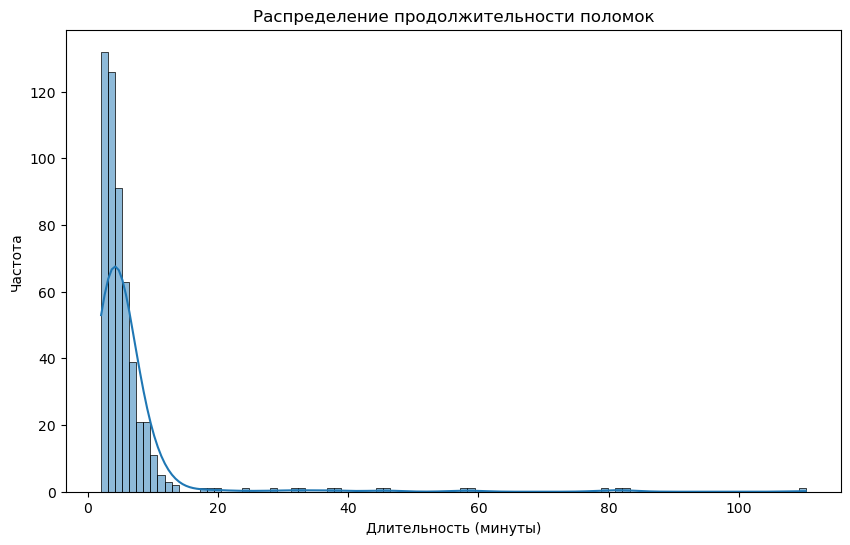

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(breakdowns_df['duration'], bins=100, kde=True)
plt.title('Распределение продолжительности поломок')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Частота')
plt.show()

Произведем проверку длительности простоя с датой начала и окончания

In [8]:
breakdowns_df['calculated_duration'] = (breakdowns_df['end'] - breakdowns_df['start']).dt.total_seconds() / 60

In [9]:
breakdowns_df['duration_diff'] = breakdowns_df['duration'] - breakdowns_df['calculated_duration']
print("\nМаксимальное отклонение между duration и calculated_duration:")
print(breakdowns_df['duration_diff'].abs().max())


Максимальное отклонение между duration и calculated_duration:
2.383333333333333


Вывод: заметили отклонения между предоставляемым и фактическим временем простоя

## Анализ категориальных признаков

In [10]:
# Анализ категориальных признаков
print("\nУникальные значения reason_group:")
print(breakdowns_df['reason_group'].value_counts())

print("\nУникальные причины поломок (reason):")
print(breakdowns_df['reason'].value_counts().head(10))


Уникальные значения reason_group:
reason_group
Breakdowns     528
Поломки/КИП      3
Name: count, dtype: int64

Уникальные причины поломок (reason):
reason
замена тормозной пластины                                    5
устранение недоливов на 38 наполнителе.                      4
Замена тормозной пластины №10                                4
КИП сбой программы розлива                                   4
КИП.МЕХ. Сбой пластичной смазки.                             3
Замена сбросного дросселя №10                                3
Замена нагнетательного дросселя №10                          3
устранение недоливов на 19 и 70 наполтителях.                3
Недолив. Пустые банки. 108/12. Замена сбросного дросселя.    2
замена дросселя 58                                           2
Name: count, dtype: int64


In [11]:
len(breakdowns_df['reason'].unique())

494

Анализ распределения длительности по группам причин

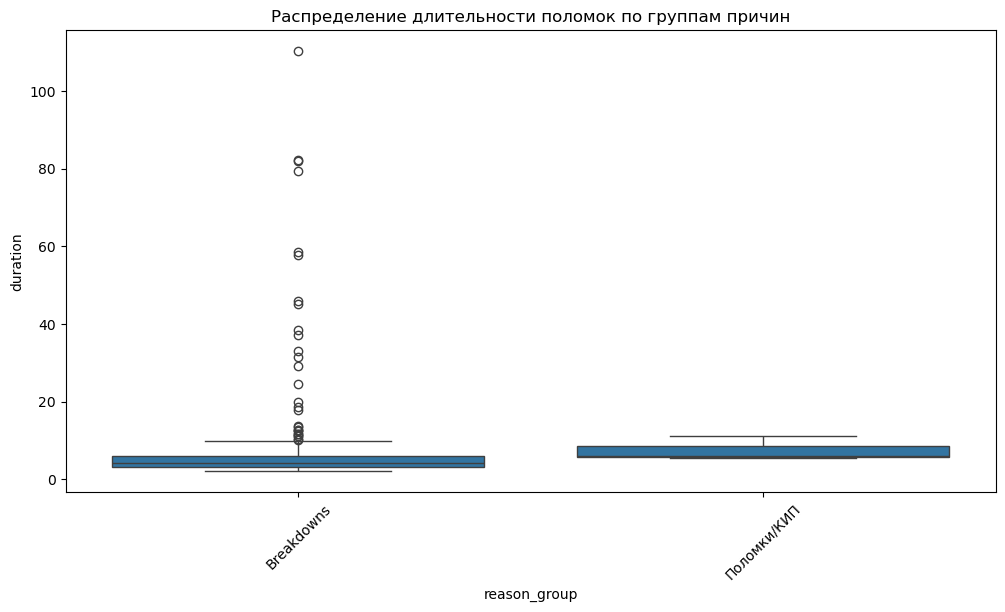

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='reason_group', y='duration', data=breakdowns_df)
plt.title('Распределение длительности поломок по группам причин')
plt.xticks(rotation=45)
plt.show()

## Анализ временных рядов

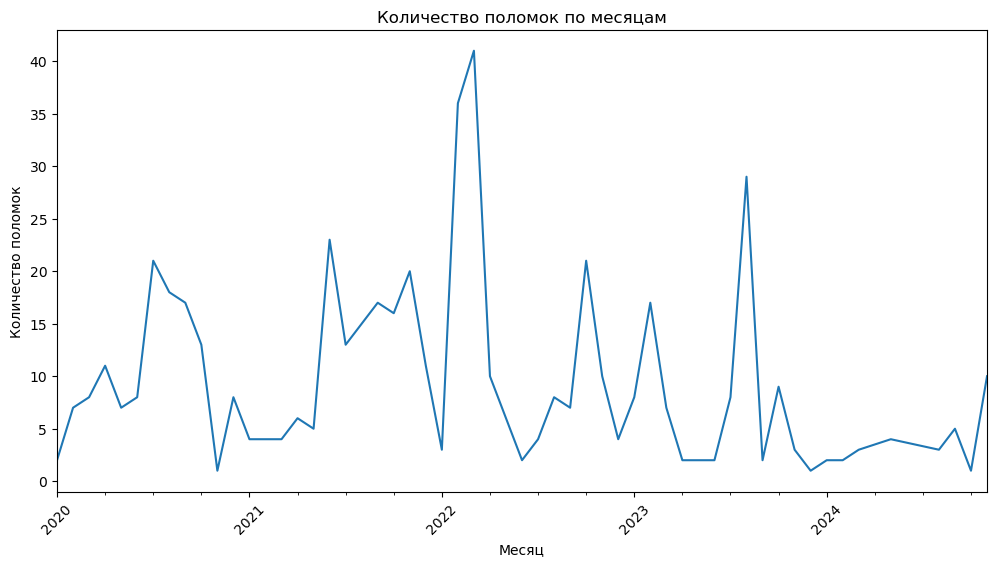

In [13]:
breakdowns_df['month'] = breakdowns_df['start'].dt.to_period('M')
monthly_breakdowns = breakdowns_df.groupby('month').size()
plt.figure(figsize=(12, 6))
monthly_breakdowns.plot()
plt.title('Количество поломок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество поломок')
plt.xticks(rotation=45)
plt.show()

# Датчики за июль

In [14]:
sensors_july_df = pd.read_excel(r'Датчики за июль 2024.xlsx')
sensors_july_df.tail()

,start,end,duration,reason
6639,2024-07-31 00:18:00,2024-07-31 00:48:00,30.016666,Производство > 95%
6640,2024-07-31 00:48:00,2024-07-31 00:50:00,2.000000,Производство > 75% < 95%
6641,2024-07-31 00:50:00,2024-07-31 01:21:00,31.516666,Производство > 95%
6642,2024-07-31 01:21:00,2024-07-31 01:22:00,0.316666,Производство > 75% < 95%
6643,2024-07-31 01:22:00,2024-07-31 08:00:00,397.883333,Останов


## Общая информация

In [15]:
print(sensors_july_df.info())
print(sensors_july_df.describe())
print(sensors_july_df.isna().sum())
print(f"Число дубликатов: {sensors_july_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6644 entries, 0 to 6643
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   start     6644 non-null   datetime64[ns]
 1   end       6644 non-null   datetime64[ns]
 2   duration  6644 non-null   float64       
 3   reason    6644 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 207.8+ KB
None
                               start                            end  \
count                           6644                           6644   
mean   2024-07-16 15:53:05.626128896  2024-07-16 15:59:35.752558592   
min              2024-07-01 08:00:00            2024-07-01 08:13:00   
25%              2024-07-08 20:27:00            2024-07-08 20:30:00   
50%              2024-07-16 13:40:30            2024-07-16 13:51:30   
75%              2024-07-24 01:41:15            2024-07-24 01:42:00   
max              2024-07-31 01:22:00       

Вывод: заметим наличие дубликатов

## Анализ временных рядов

Проверка диапазона

In [16]:
print(f"Минимальная дата: {sensors_july_df['start'].min()}")
print(f"Максимальная дата: {sensors_july_df['end'].max()}")

Минимальная дата: 2024-07-01 08:00:00
Максимальная дата: 2024-07-31 08:00:00


Вывод: соответствует описанию

Проверка на некорректные интервалы

In [17]:
invalid_intervals = sensors_july_df[sensors_july_df['start'] > sensors_july_df['end']]
print(f"Некорректные интервалы: {invalid_intervals}")

Некорректные интервалы: Empty DataFrame
Columns: [start, end, duration, reason]
Index: []


## Анализ числовых признаков (duration)

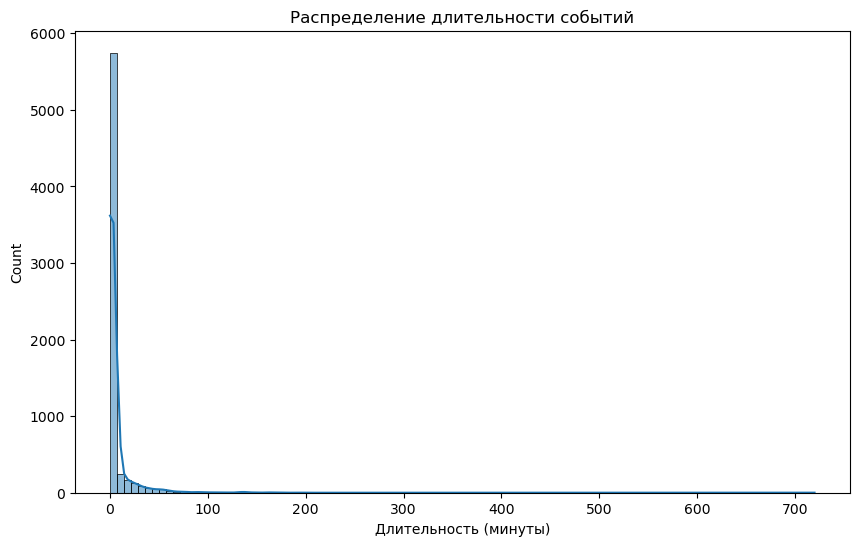

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(sensors_july_df['duration'], bins=100, kde=True)
plt.title('Распределение длительности событий')
plt.xlabel('Длительность (минуты)')
plt.show()

Проверка на выбросы по длительности

In [19]:
q1 = sensors_july_df['duration'].quantile(0.25)
q3 = sensors_july_df['duration'].quantile(0.75)
iqr = q3 - q1
outliers = sensors_july_df[(sensors_july_df['duration'] < (q1 - 1.5 * iqr)) | (sensors_july_df['duration'] > (q3 + 1.5 * iqr))]
print(f"Число выбросов: {len(outliers)}")

Число выбросов: 811


Анализ duration на времени

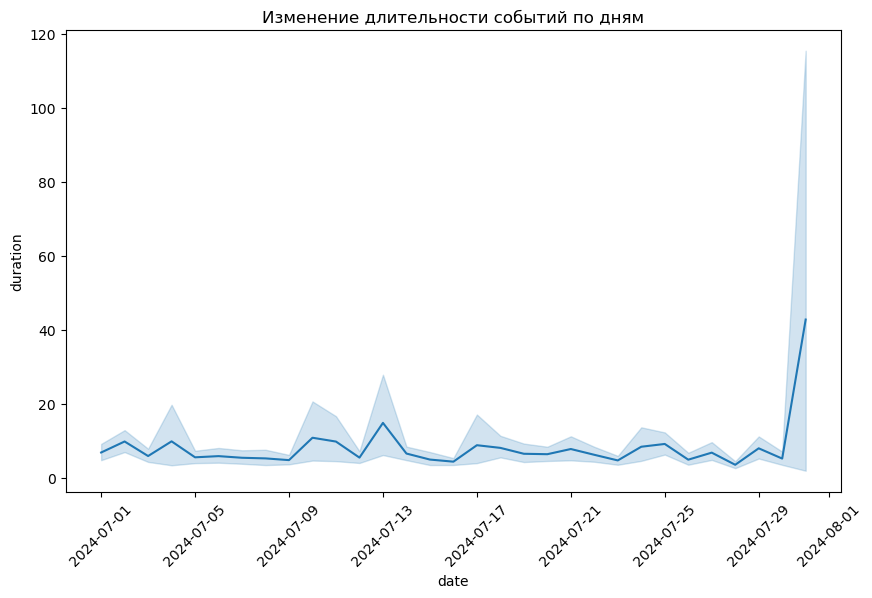

In [20]:
sensors_july_df['date'] = sensors_july_df['start'].dt.date
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='duration', data=sensors_july_df)
plt.title('Изменение длительности событий по дням')
plt.xticks(rotation=45)
plt.show()

## Анализ категориальных признаков (reason)

reason
Производство > 75% < 95%     1918
Производство < 75%           1799
Производство > 95%           1030
Вмешательство оператора\n     637
Внешняя ошибка                575
Нехватка на входе             231
Затор на выходе               198
Останов                       188
Аварийная остановка            41
Ручное управление              17
Неизвестно                      5
Внутренняя ошибка\n             5
Name: count, dtype: int64


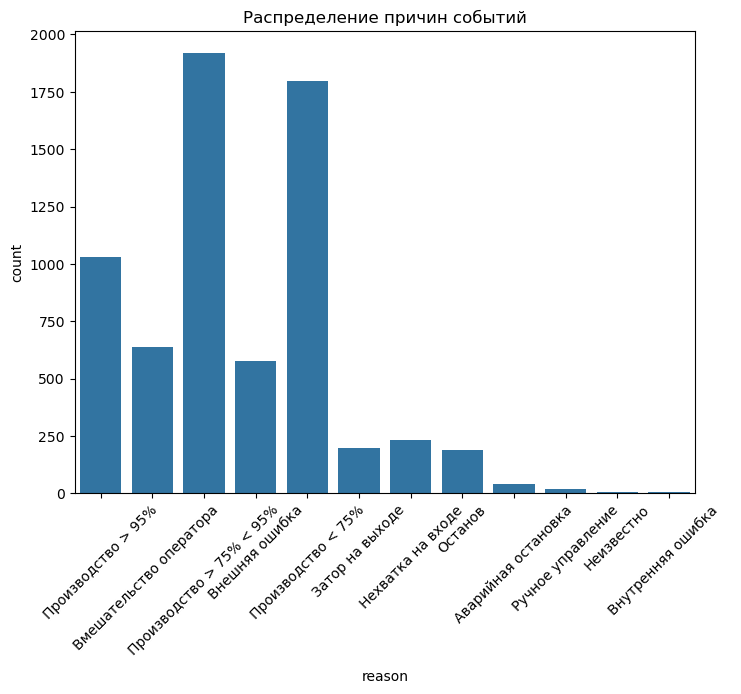

In [21]:
print(sensors_july_df['reason'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='reason', data=sensors_july_df)
plt.title('Распределение причин событий')
plt.xticks(rotation=45)
plt.show()

# Анализ простоев за июль

Простои за июль 2024.xlsx

In [22]:
downtime_july_df = pd.read_excel(r'Простои за июль 2024.xlsx')
downtime_july_df.tail()

,start,end,duration,downtime,reason,description,reason_id,detailed_description,component
341,2024-07-30 19:11:29,2024-07-30 19:15:52,4.383333,Санитарные регламенты,Внешние мойки,Ополаскивание укупора и розлива,2310502,Обл.гор. водой,Автомат укупорочный
342,2024-07-30 21:05:44,2024-07-30 21:09:39,3.916666,Организационные,Проверки по качеству,Лабораторные проверки,2512701,Отбор проб.,Розлив
343,2024-07-30 21:42:00,2024-07-31 00:08:57,146.950000,Переналадки,Переход через щ. СИП,Продукт СИП щ. продукт,2214201,Переход на FLash. СИП. АПМ.,Розлив
344,2024-07-31 00:09:34,2024-07-31 00:11:55,2.350000,Переналадки,Переход через щ. СИП,Продукт СИП щ. продукт,2214201,Переход на FLash. СИП. АПМ.,Розлив
345,2024-07-31 01:22:07,2024-07-31 08:00:00,397.883333,Недоступное время,Отсутствие заявок,Отсутствие заявок,2913801,Отсутствие заявок.,Розлив


## Общая информация

In [23]:
print(downtime_july_df.info())
print(downtime_july_df.describe())
print(downtime_july_df.isna().sum())
print(f"Число дубликатов: {downtime_july_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   start                 346 non-null    datetime64[ns]
 1   end                   346 non-null    datetime64[ns]
 2   duration              346 non-null    float64       
 3   downtime              346 non-null    object        
 4   reason                346 non-null    object        
 5   description           346 non-null    object        
 6   reason_id             346 non-null    int64         
 7   detailed_description  346 non-null    object        
 8   component             346 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 24.5+ KB
None
                               start                            end  \
count                            346                            346   
mean   2024-07-15 20:26:43.95

## Анализ временного ряда

In [24]:
print(f"Минимальная дата: {downtime_july_df['start'].min()}")
print(f"Максимальная дата: {downtime_july_df['end'].max()}")

Минимальная дата: 2024-07-01 11:35:08
Максимальная дата: 2024-07-31 08:00:00


In [25]:
invalid_intervals = downtime_july_df[downtime_july_df['start'] > downtime_july_df['end']]
print(f"Некорректные интервалы: {invalid_intervals}")

Некорректные интервалы: Empty DataFrame
Columns: [start, end, duration, downtime, reason, description, reason_id, detailed_description, component]
Index: []


## Анализ количественных признаков

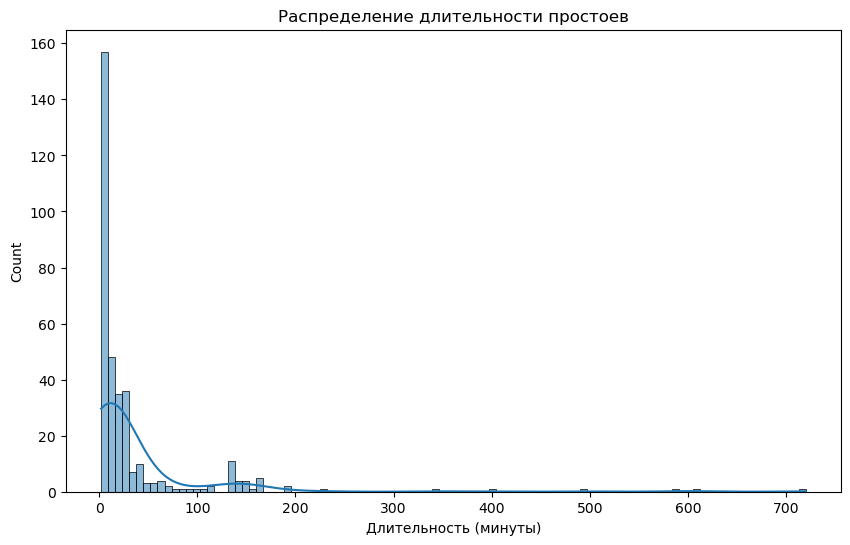

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(downtime_july_df['duration'], bins=100, kde=True)
plt.title('Распределение длительности простоев')
plt.xlabel('Длительность (минуты)')
plt.show()

In [27]:
q1 = downtime_july_df['duration'].quantile(0.25)
q3 = downtime_july_df['duration'].quantile(0.75)
iqr = q3 - q1
outliers = downtime_july_df[(downtime_july_df['duration'] < (q1 - 1.5 * iqr)) | (downtime_july_df['duration'] > (q3 + 1.5 * iqr))]
print(f"Число выбросов: {len(outliers)}")

Число выбросов: 47


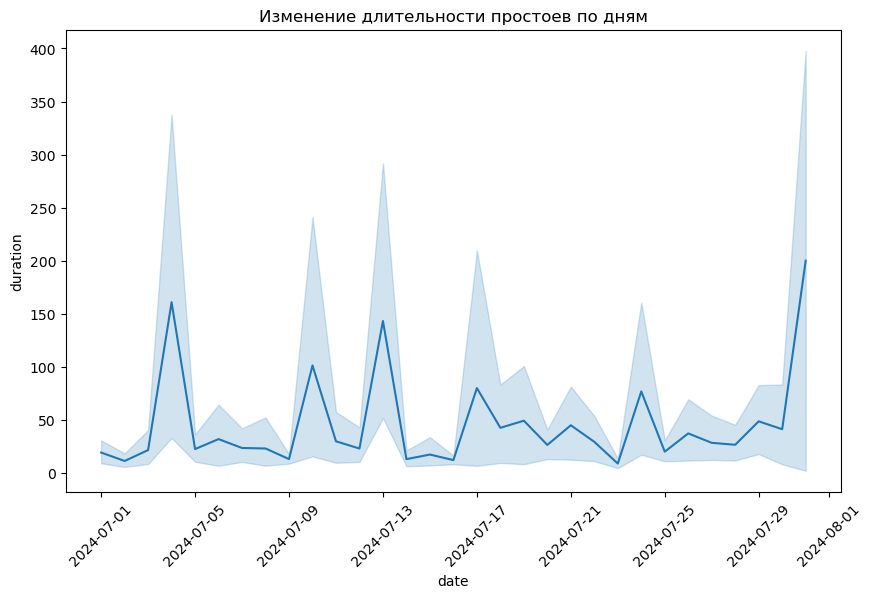

In [28]:
downtime_july_df['date'] = downtime_july_df['start'].dt.date
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='duration', data=downtime_july_df)
plt.title('Изменение длительности простоев по дням')
plt.xticks(rotation=45)
plt.show()

## Анализ категориальных признаков

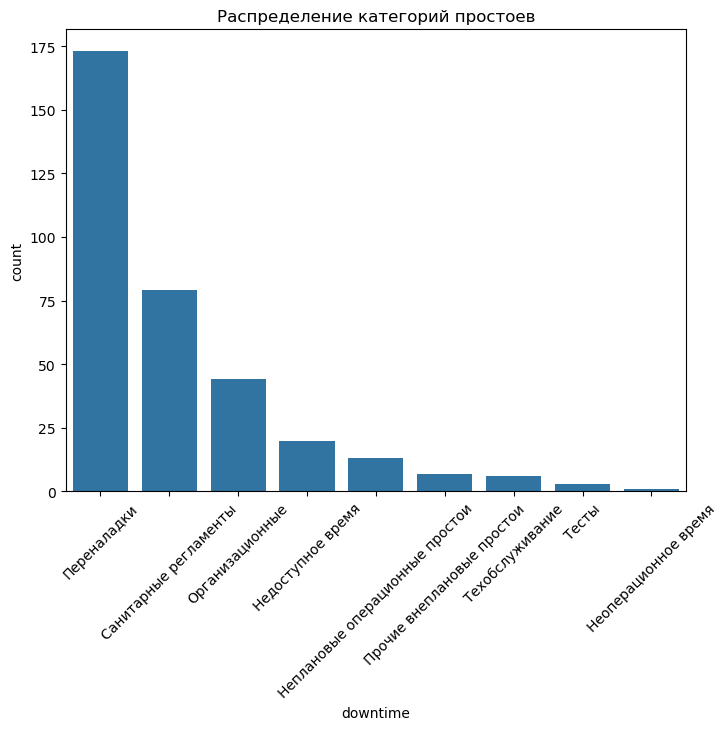

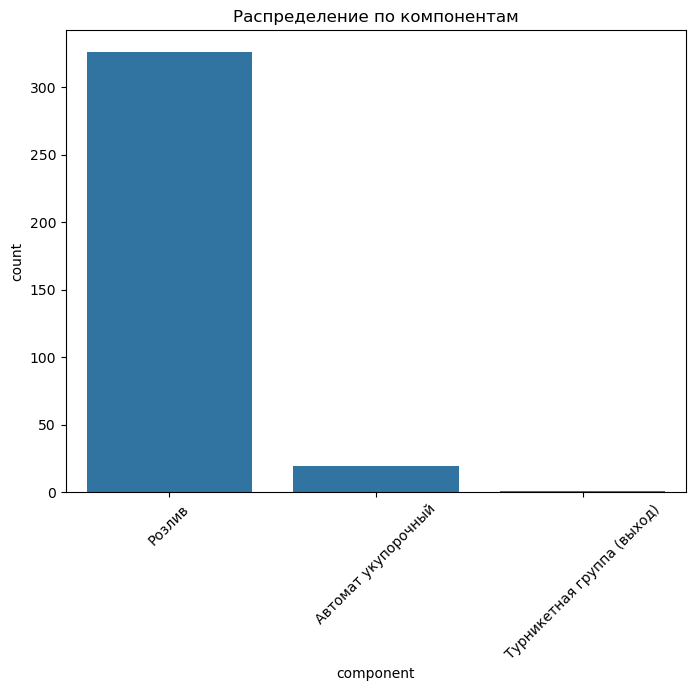

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='downtime', data=downtime_july_df, order=downtime_july_df['downtime'].value_counts().index)
plt.title('Распределение категорий простоев')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='component', data=downtime_july_df, order=downtime_july_df['component'].value_counts().index)
plt.title('Распределение по компонентам')
plt.xticks(rotation=45)
plt.show()

In [30]:
print(downtime_july_df['reason'].value_counts())
print(downtime_july_df['description'].value_counts())
print(downtime_july_df['detailed_description'].value_counts())

reason
Переход продукт вода продукт          81
Внешние мойки                         79
Переход через щ. СИП                  43
Проверки по качеству                  23
Перерывы                              21
Отсутствие заявок                     20
Переход продукт на продукт            17
Комментируемые остановки              13
Смена бутылки/банки                   13
Переход через стерил.                  8
Смена этикетки                         8
ПТО                                    6
Загруженность склада                   5
Тесты материалов                       3
Недостаточное количество персонала     2
Втор. упак.                            2
Переход через щ-к СИП                  1
Поддержка производства                 1
Name: count, dtype: int64
description
Переход продукт вода продукт                            46
Продукт СИП щ. продукт                                  43
Переход продукт вода продукт + АПМ                      35
АПМ (Пенная санитарная обработка)       